In [3]:
from ps_utils import read_data_file, unbiased_integrate, display_surface, ransac_3dvector, smooth_normal_field
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (24,12)

Populating the interactive namespace from numpy and matplotlib


# Beethoven

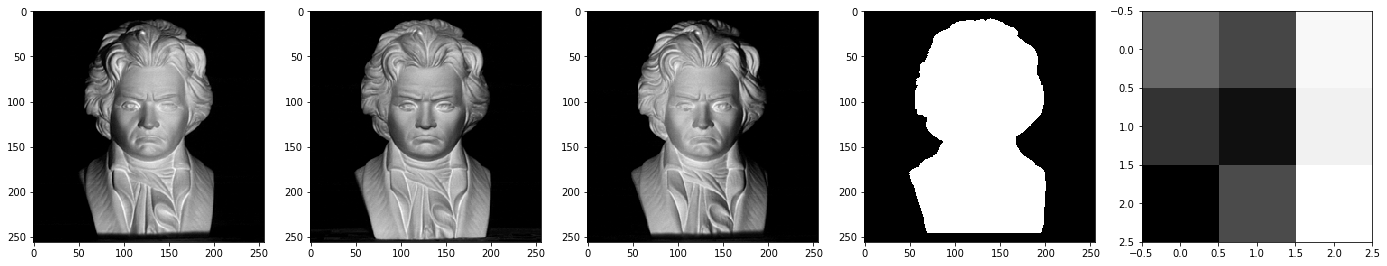

In [13]:
I, mask, S = read_data_file('Beethoven.mat')
_, ax = plt.subplots(1,5)
ax[0].imshow(I[:,:,0], cmap='gray')
ax[1].imshow(I[:,:,1], cmap='gray')
ax[2].imshow(I[:,:,2], cmap='gray')
ax[3].imshow(mask, cmap='gray')
ax[4].imshow(S, cmap='gray')

In [9]:
m = np.linalg.pinv(S)
nz = np.sum(mask)
J = np.zeros((3,nz))

j = 0
m_flat = mask.flatten()
i_all = np.vstack((I[:,:,0].flatten(), I[:,:,1].flatten(), I[:,:,2].flatten()))
for i in range(len(I[:,:,0].flatten())):
    if m_flat[i]:
        J[0,j] = i_all[0,i]
        J[1,j] = i_all[1,i]
        J[2,j] = i_all[2,i]
        j += 1

M = m @ J
M1 = M[0]
M2 = M[1]
M3 = M[2]
rho = np.sqrt(M1**2 + M2**2 + M3**2)

j = 0
img = np.ndarray(256 * 256)
for i in range(len(img)):
    if m_flat[i]:
        img[i] = rho[j]
        j += 1
    else:
        img[i] = 0

albedo = img.reshape((256, 256))
plt.imshow(albedo, cmap='gray')

n1 = M1 / rho
n2 = M2 / rho
n3 = M3 / rho

j = 0
N1 = np.ndarray(256 * 256)
N2 = np.ndarray(256 * 256)
N3 = np.ndarray(256 * 256)
for i in range(len(N1)):
    if m_flat[i]:
        N1[i] = n1[j]
        N2[i] = n2[j]
        N3[i] = n3[j]
        j += 1
    else:
        N1[i] = 0
        N2[i] = 0
        N3[i] = 0

N1 = N1.reshape(256,256)
N2 = N2.reshape(256,256)
N3 = N3.reshape(256,256)
img = unbiased_integrate(N1, N2, N3, mask)

display_surface(img, albedo=albedo)

# Vase

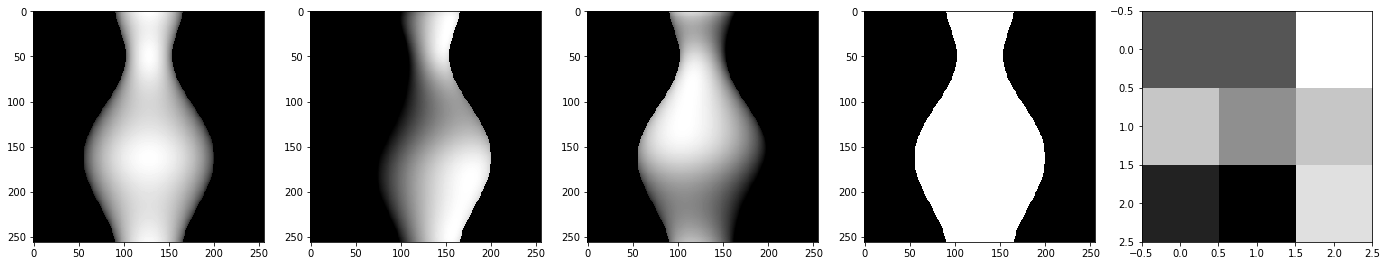

In [4]:
I, mask, S = read_data_file('mat_vase.mat')
_, ax = plt.subplots(1,5)
ax[0].imshow(I[:,:,0], cmap='gray')
ax[1].imshow(I[:,:,1], cmap='gray')
ax[2].imshow(I[:,:,2], cmap='gray')
ax[3].imshow(mask, cmap='gray')
ax[4].imshow(S, cmap='gray')

/Users/Casper/Documents/Uni/VIP/Week3/ps_utils.py:437: RuntimeWarning: invalid value encountered in true_divide
  p = -n2/n3
/Users/Casper/Documents/Uni/VIP/Week3/ps_utils.py:438: RuntimeWarning: invalid value encountered in true_divide
  q = -n1/n3


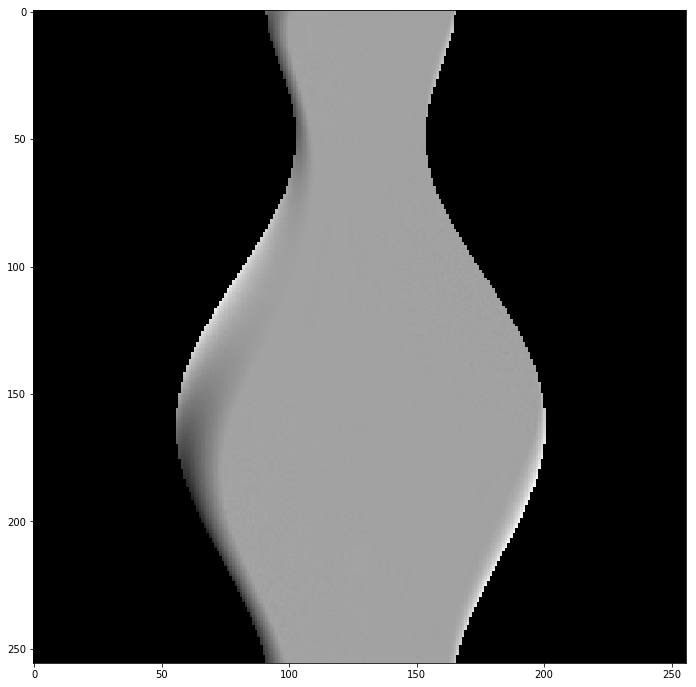

In [16]:
m = np.linalg.pinv(S)
nz = np.sum(mask)
J = np.zeros((3,nz))

j = 0
m_flat = mask.flatten()
i_all = np.vstack((I[:,:,0].flatten(), I[:,:,1].flatten(), I[:,:,2].flatten()))
for i in range(len(I[:,:,0].flatten())):
    if m_flat[i]:
        J[0,j] = i_all[0,i]
        J[1,j] = i_all[1,i]
        J[2,j] = i_all[2,i]
        j += 1

M = m @ J
M1 = M[0]
M2 = M[1]
M3 = M[2]
rho = np.sqrt(M1**2 + M2**2 + M3**2)

j = 0
img = np.ndarray(256 * 256)
for i in range(len(img)):
    if m_flat[i]:
        img[i] = rho[j]
        j += 1
    else:
        img[i] = 0

albedo = img.reshape((256, 256))
plt.imshow(albedo, cmap='gray')

n1 = M1 / rho
n2 = M2 / rho
n3 = M3 / rho

j = 0
N1 = np.ndarray(256 * 256)
N2 = np.ndarray(256 * 256)
N3 = np.ndarray(256 * 256)
for i in range(len(N1)):
    if m_flat[i]:
        N1[i] = n1[j]
        N2[i] = n2[j]
        N3[i] = n3[j]
        j += 1
    else:
        N1[i] = 0
        N2[i] = 0
        N3[i] = 0

N1 = N1.reshape(256,256)
N2 = N2.reshape(256,256)
N3 = N3.reshape(256,256)
img = unbiased_integrate(N1, N2, N3, mask)

display_surface(img, albedo=albedo)

# Shiny Vase

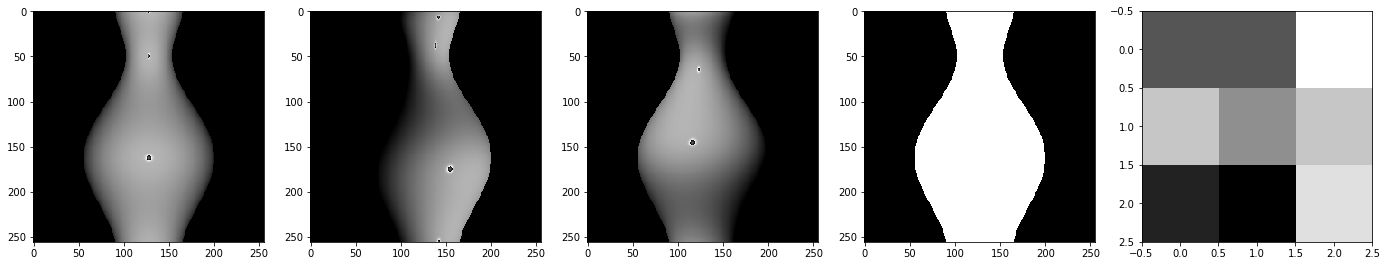

In [4]:
I, mask, S = read_data_file('shiny_vase.mat')
_, ax = plt.subplots(1,5)
ax[0].imshow(I[:,:,0], cmap='gray')
ax[1].imshow(I[:,:,1], cmap='gray')
ax[2].imshow(I[:,:,2], cmap='gray')
ax[3].imshow(mask, cmap='gray')
ax[4].imshow(S, cmap='gray')

/Users/Casper/Documents/Uni/VIP/VIP/Week3/ps_utils.py:437: RuntimeWarning: invalid value encountered in true_divide
  p = -n2/n3
/Users/Casper/Documents/Uni/VIP/VIP/Week3/ps_utils.py:438: RuntimeWarning: invalid value encountered in true_divide
  q = -n1/n3


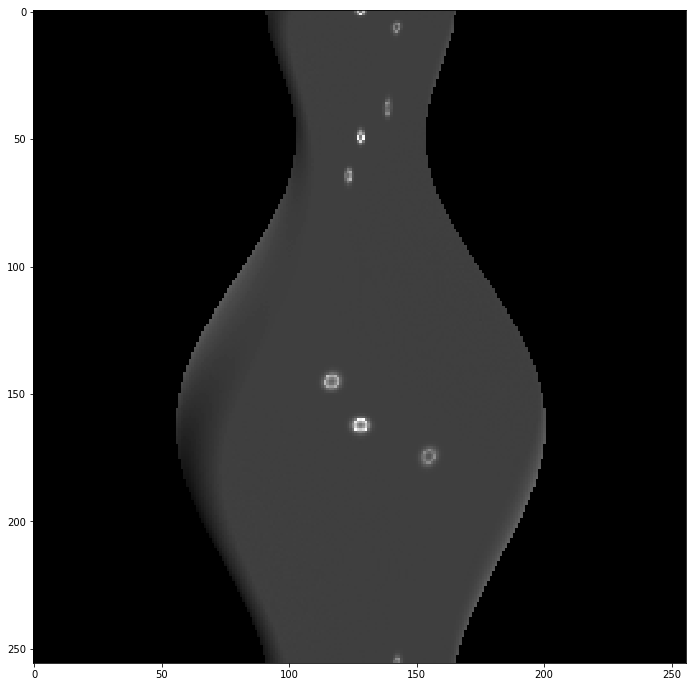

In [8]:
m = np.linalg.pinv(S)
nz = np.sum(mask)
J = np.zeros((3,nz))

j = 0
m_flat = mask.flatten()
i_all = np.vstack((I[:,:,0].flatten(), I[:,:,1].flatten(), I[:,:,2].flatten()))
for i in range(len(I[:,:,0].flatten())):
    if m_flat[i]:
        J[0,j] = i_all[0,i]
        J[1,j] = i_all[1,i]
        J[2,j] = i_all[2,i]
        j += 1

M = m @ J
M1 = M[0]
M2 = M[1]
M3 = M[2]
rho = np.sqrt(M1**2 + M2**2 + M3**2)

j = 0
img = np.ndarray(256 * 256)
for i in range(len(img)):
    if m_flat[i]:
        img[i] = rho[j]
        j += 1
    else:
        img[i] = 0

albedo = img.reshape((256, 256))
plt.imshow(albedo, cmap='gray')

n1 = M1 / rho
n2 = M2 / rho
n3 = M3 / rho

j = 0
N1 = np.ndarray(256 * 256)
N2 = np.ndarray(256 * 256)
N3 = np.ndarray(256 * 256)
for i in range(len(N1)):
    if m_flat[i]:
        N1[i] = n1[j]
        N2[i] = n2[j]
        N3[i] = n3[j]
        j += 1
    else:
        N1[i] = 0
        N2[i] = 0
        N3[i] = 0

N1 = N1.reshape(256,256)
N2 = N2.reshape(256,256)
N3 = N3.reshape(256,256)
img = unbiased_integrate(N1, N2, N3, mask)

display_surface(img)

# Shiny part 2

/Users/Casper/Documents/Uni/VIP/VIP/Week3/ps_utils.py:437: RuntimeWarning: invalid value encountered in true_divide
  p = -n2/n3
/Users/Casper/Documents/Uni/VIP/VIP/Week3/ps_utils.py:438: RuntimeWarning: invalid value encountered in true_divide
  q = -n1/n3


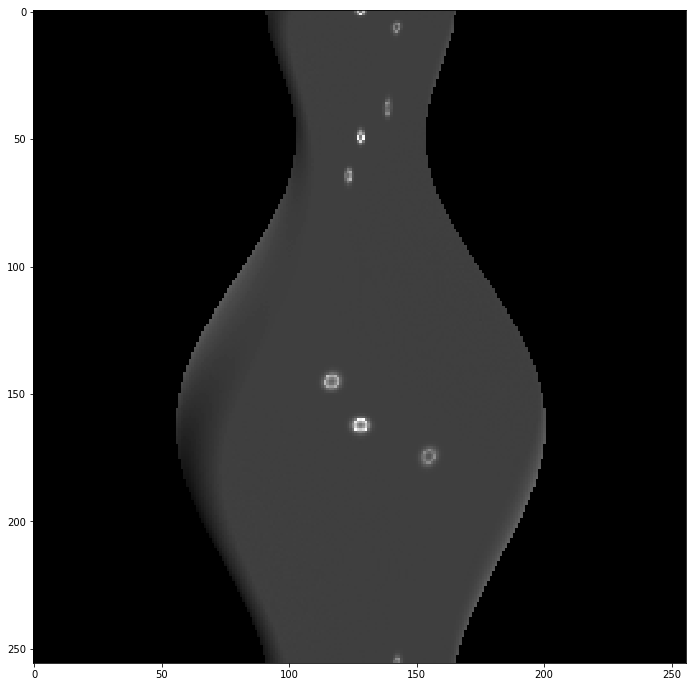

In [9]:
nz = np.sum(mask)
J = np.zeros((3,nz))

j = 0
m_flat = mask.flatten()
i_all = np.vstack((I[:,:,0].flatten(), I[:,:,1].flatten(), I[:,:,2].flatten()))
for i in range(len(I[:,:,0].flatten())):
    if m_flat[i]:
        J[0,j] = i_all[0,i]
        J[1,j] = i_all[1,i]
        J[2,j] = i_all[2,i]
        j += 1

rho_shiny = np.ndarray(nz)
n1 = np.ndarray(nz)
n2 = np.ndarray(nz)
n3 = np.ndarray(nz)
for i in range(nz):
    tmp = np.array([J[0,i], J[1,i], J[2,i]])
    m, inliers, best_fit = ransac_3dvector((tmp, S), 1.0, verbose=0)
    norm = np.sqrt(m[0]**2 + m[1]**2 + m[2]**2)
    rho_shiny[i] = norm
    n1[i] = m[0] / norm
    n2[i] = m[1] / norm
    n3[i] = m[2] / norm

j = 0
m_flat = mask.flatten()
img = np.ndarray(256 * 256)
N1 = np.ndarray(256 * 256)
N2 = np.ndarray(256 * 256)
N3 = np.ndarray(256 * 256)
for i in range(len(img)):
    if m_flat[i]:
        img[i] = rho_shiny[j]
        N1[i] = n1[j]
        N2[i] = n2[j]
        N3[i] = n3[j]
        j += 1
    else:
        img[i] = 0
        N1[i] = 0
        N2[i] = 0
        N3[i] = 0

albedo = img.reshape((256, 256))
plt.imshow(albedo, cmap='gray')

N1 = N1.reshape(256,256)
N2 = N2.reshape(256,256)
N3 = N3.reshape(256,256)
#N1, N2, N3 = smooth_normal_field(N1, N2, N3, mask)
model = unbiased_integrate(N1, N2, N3, mask)


display_surface(model)